In [1]:
import sys
import numpy as np
from matplotlib import pyplot as plt


sys.path.append('../')

from BGS import BGS
from FileEmcee import FileEmcee
from Fileh5 import Fileh5
from EmceeRun import EmceeRun
from Plotter import Plotter
from VMaxDensity import VmaxDensity
from ZSchechterModel import ZSchechterModel

In [2]:
bgs = BGS('BGS_ANY_full.provabgs.lite.hdf5', is_bgs_bright=True)
emcee_run02, emcee_run03, emcee_run04 = EmceeRun.run_comparison()

In [4]:
plotter = Plotter(bgs, emcee_run04)
vmax_hist = VmaxDensity(bgs.file, is_bgs_bright=True)       

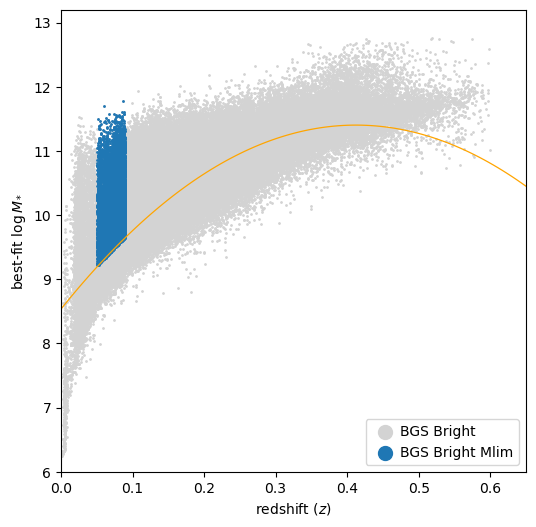

In [6]:
plt.figure(figsize=(6,6))
plotter.plot_selected_data(0.05, 0.09)

In [8]:
from scipy import integrate
a0, a1, a2, a3 = emcee_run02.get_best_params()
zsmf = ZSchechterModel(bgs, 0.0, 0.3, 0.15)
I = [integrate.quad(ZSchechterModel.phi, zsmf.mlim[i], 13., args=(zsmf.z0, a0, a1, a2, a3))[0] for i in
             range(zsmf.mlim.shape[0])]

In [12]:
def vec_integral():
    a0, a1, a2, a3 = emcee_run02.get_best_params()
    zsmf = ZSchechterModel(bgs, 0.0, 0.3, 0.15)
    I = [integrate.quad(ZSchechterModel.phi, zsmf.mlim[i], 13., args=(zsmf.z0, a0, a1, a2, a3))[0] for i in
             range(zsmf.mlim.shape[0])]

vfunc = np.vectorize(square)
vfunc([1,2,3,4,5,6])

array([ 1,  4,  9, 16, 25, 36])

In [9]:
I

[0.1494094905823457,
 0.34949558487774934,
 0.9618365324997895,
 0.7874997604560665,
 0.1442434520616585,
 0.06016961310386429,
 0.9958419539068394,
 0.965781718590387,
 0.14480964674977823,
 0.9375808058494632,
 0.7889124010535528,
 0.515402573490185,
 0.9493519655842025,
 0.8155388128802945,
 0.07841823324839527,
 0.967402508835419,
 0.04055323335977088,
 0.03844306430424035,
 0.0871113710071129,
 0.5903359229159614,
 0.9138656328761605,
 1.1158328461245108,
 1.0076743884690458,
 0.8733426951575581,
 1.2525512276534667,
 1.250861787561547,
 0.1447487785726428,
 0.4158974630307452,
 0.4291542100234916,
 0.2336434507598717,
 0.07964339314458498,
 0.3903737984357987,
 0.33772359242686145,
 0.12976900110723133,
 0.14562931746658303,
 0.784962150057717,
 0.18103606889349247,
 0.27506175858989157,
 0.2742084117804799,
 0.7964930806186579,
 0.9751947936435121,
 1.1071208068543683,
 0.29409952004680107,
 0.280346034525813,
 0.5795159011655686,
 0.5605536468959581,
 0.2807470775825235,
 0.765

## Comparison $1/V_{max}$ - $\Phi(M_{*}, z)$ at different redshift bins

In [ ]:
zmins = np.array([0.01 + 0.04 * i for i in range(9)])
zmaxs = np.array([0.05 + 0.04 * i for i in range(9)])

x_lin_ext = np.linspace(7, 14, 100)

fig = plt.figure(figsize=(15,30))

plot_params_ext = {'color': 'orange', 'linestyle':'--', 'linewidth':0.7}
plot_params = {'color':'orange', 'linestyle':'-'}

plot_params_ext2 = {'color': 'green', 'linestyle':'--', 'linewidth':0.7}
plot_params2 = {'color':'green', 'linestyle':'-'}

plot_params_ext3 = {'color': 'red', 'linestyle':'--', 'linewidth':0.7}
plot_params3 = {'color':'red', 'linestyle':'-'}

for i, zmin, zmax, z0 in zip(range(9), zmins, zmaxs, zmins + (zmaxs - zmins)/2.):
    plt.subplot(5,2,i+1)

    # TODO REMEMBER THAT YOU SHOULD CALCULATE THE NORMALISATION FROM SCRATCH FOR EACH DRAW FROM THE SAMPLES
    inds = np.random.randint(len(emcee_run.flat_samples), size=100)
    for ind in inds:
        z_smf_err = ZSchechterModel(bgs, zmin, zmax, z0)
    
        n_err = z_smf_err.normalisation(emcee_run.flat_samples[ind])
        
        Plotter.plot_zschechter(x_lin_ext, z0, n_err, emcee_run.flat_samples[ind], **{'alpha':0.1, 'color':'green'})
#   --------------------------------------------------------------------------------------------------------------
    
    
    h, b, _h, _b = vmax_hist.histogram_norm(zmin, zmax)
    z_smf = ZSchechterModel(bgs, zmin, zmax, z0)
    
    n = z_smf.normalisation(best_params)


    x_lin = np.linspace(z_smf.mlim.min(), 14, 100)

    plotter.plot_vmax_hist(h, b, _h, _b, **{'label':f'${zmin:.2f}< z <{zmax:.2f}$'})
    Plotter.plot_zschechter(x_lin, z0, n, best_params, **plot_params)
    Plotter.plot_zschechter(x_lin_ext, z0, n, best_params, **plot_params_ext)


    
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.legend(loc='best')
plt.show()    

In [ ]:
zmins = np.array([0.01 + 0.04 * i for i in range(9)])
zmaxs = np.array([0.05 + 0.04 * i for i in range(9)])

x_lin_ext = np.linspace(7, 14, 100)

fig = plt.figure(figsize=(6,6))



# plot_params_ext2 = {'color': 'green', 'linestyle':'--', 'linewidth':0.7}
# plot_params2 = {'color':'green', 'linestyle':'-'}

# plot_params_ext3 = {'color': 'red', 'linestyle':'--', 'linewidth':0.7}
# plot_params3 = {'color':'red', 'linestyle':'-'}

for i, zmin, zmax, z0 in zip(range(4), zmins, zmaxs, zmins + (zmaxs - zmins)/2.):

    z_smf = ZSchechterModel(bgs, zmin, zmax, z0)
    
    n = z_smf.normalisation(best_params)


    x_lin = np.linspace(z_smf.mlim.min(), 14, 100)

    plot_params_ext = {'color': f'C{i}', 'linestyle':'--', 'linewidth':0.7}
    plot_params = {'color':f'C{i}', 'linestyle':'-', 'label':f'{z0:.2f}'}
    
    Plotter.plot_zschechter(x_lin, z0, n, best_params, **plot_params)
    # Plotter.plot_zschechter(x_lin_ext, z0, n, best_params, **plot_params_ext)
    
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.legend(loc='best')
plt.show()    

In [ ]:
zsmfs = [ZSchechterModel(bgs, zmin, zmax, z0) for zmin, zmax, z0 in zip(zmins, zmaxs, zmins + (zmaxs - zmins)/2.)]
vmax_hists = [vmax_hist.histogram_norm(zmin, zmax) for zmin, zmax in zip(zmins, zmaxs)]
ns = [z_smf.normalisation(best_params) for z_smf in zsmfs]
z0s = zmins + (zmaxs - zmins)/2.

In [ ]:
plt.figure(figsize=(13,20))

for i in range(8):
    plt.subplot(4, 2, i+1)
    
    h_i, b_i, _h_i, _b_i = vmax_hists[i]
    h_i1, b_i1, _h_i1, _b_i1 = vmax_hists[i+1]
    # z_smf_i = zsmfs[i]
    # z_smf_i1 = zsmfs[i+1]
    n_i = ns[i]
    n_i1 = ns[i+1]


    Plotter.plot_vmax_hist(h_i, b_i, h_i, b_i, **{'color':f'C{i}', 'label':f'${round(zmins[i],2)}< z <{round(zmaxs[i],2)}$'})
    Plotter.plot_vmax_hist(h_i1, b_i1, h_i1, b_i1, **{'color':f'C{i+1}', 'label':f'${round(zmins[i+1],2)}< z <{round(zmaxs[i+1],2)}$'})
    Plotter.plot_zschechter(x_lin_ext, z0s[i], n_i, best_params, 
                            **{'color':f'C{i}', 'label':fr'$z_{0}={round(z0s[i],2)} - logM^* = {round(best_params[0] + best_params[1]*z0s[i],2)}$'})
    Plotter.plot_zschechter(x_lin_ext, z0s[i+1], n_i1, best_params, 
                            **{'color':f'C{i+1}', 
                               'label':fr'$z_{0}={round(z0s[i+1],2)} - logM^* = {round(best_params[0] + best_params[1]*z0s[i+1],2)}$'})

    plt.legend(loc='lower left')

plt.savefig('../paper/fig/pair_comp_ZSchechter.png')

In [ ]:
gal_bin = []
b_edges = []
for zmin, zmax in zip(zmins,zmaxs):
    _, _, x_median, _, _ = bgs.select_galaxies(zmin, zmax)
    h, b = np.histogram(x_median, range=(6,13), bins=40)
    gal_bin.append(h)
    b_edges.append(b)

In [ ]:
gal_bin[3], np.sum(gal_bin[3])

In [ ]:
plt.figure(figsize=(13,20))
for i in range(len(gal_bin)-1):
    plt.subplot(4, 2, i+1)
    plt.step(b_edges[0][:-1], gal_bin[i], c=f'C{i}', label = f'${round(zmins[i],2)}< z <{round(zmaxs[i],2)}$')
    plt.step(b_edges[0][:-1], gal_bin[i+1], c=f'C{i+1}', label = f'${round(zmins[i+1],2)}< z <{round(zmaxs[i+1],2)}$')
    plt.xlabel(r'$\log M_*$')
    plt.ylabel('$N$')
    plt.xlim(8, 12.5)
    plt.legend()

plt.savefig('../paper/fig/pair_comp_ngalaxies.png')

In [ ]:
z, x, x_median, w_spec, vmax = bgs.select_galaxies(0.29,0.33)

In [ ]:
z.shape

In [ ]:
mid_bin = b_edges[0] + (13-6)/40

In [ ]:
for gal_bin_i in gal_bin:
    plt.scatter(mid_bin[:-1], gal_bin_i)
    plt.xlim(8.5, 12.5)